In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
data = pd.read_csv('transformed_data.csv')

In [10]:
# Calculate the total revenue for each booking (assuming ADR is per night and considering the number of nights)
data['revenue'] = data['adr'] * data['stay_duration']

# Group by market segment and calculate total revenue
revenue_by_market_segment = data.groupby('market_segment')['revenue'].sum().sort_values(ascending=False)

In [11]:
# Select features and target variable
features = data[['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment']]
target = data['revenue']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the preprocessing for numeric and categorical features
numeric_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']
categorical_features = ['hotel', 'meal', 'market_segment']

In [13]:
# Create a column transformer with standard scaling for numeric features and one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [14]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies']),
                                                 ('cat', OneHotEncoder(),
                                                  ['hotel', 'meal',
                                                   'market_segment'])])),
                ('regressor', LinearRegression())])

##  Evaluate the Model

In [15]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 122.43902210884355
Mean Squared Error: 42472.95556129555
R-squared: 0.6357536094042581


## Trying other model

In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [17]:
# Define the model pipelines
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

In [18]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies']),
                                                 ('cat', OneHotEncoder(),
                                                  ['hotel', 'meal',
                                                   'market_segment'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [19]:
# Make predictions on the test data with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')

Random Forest Performance:
Mean Absolute Error: 86.49520742224367
Mean Squared Error: 29648.631697524765
R-squared: 0.7457345047169944


In [21]:
# Make predictions on the test data with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print(f'Mean Absolute Error: {mae_gb}')
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')


Gradient Boosting Performance:
Mean Absolute Error: 102.12847351144836
Mean Squared Error: 30215.285962320493
R-squared: 0.7408749001064875


## Feature Importance

In [22]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.named_steps['regressor'].feature_importances_

# Get feature names
feature_names = rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features).tolist() + numeric_features

In [23]:
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

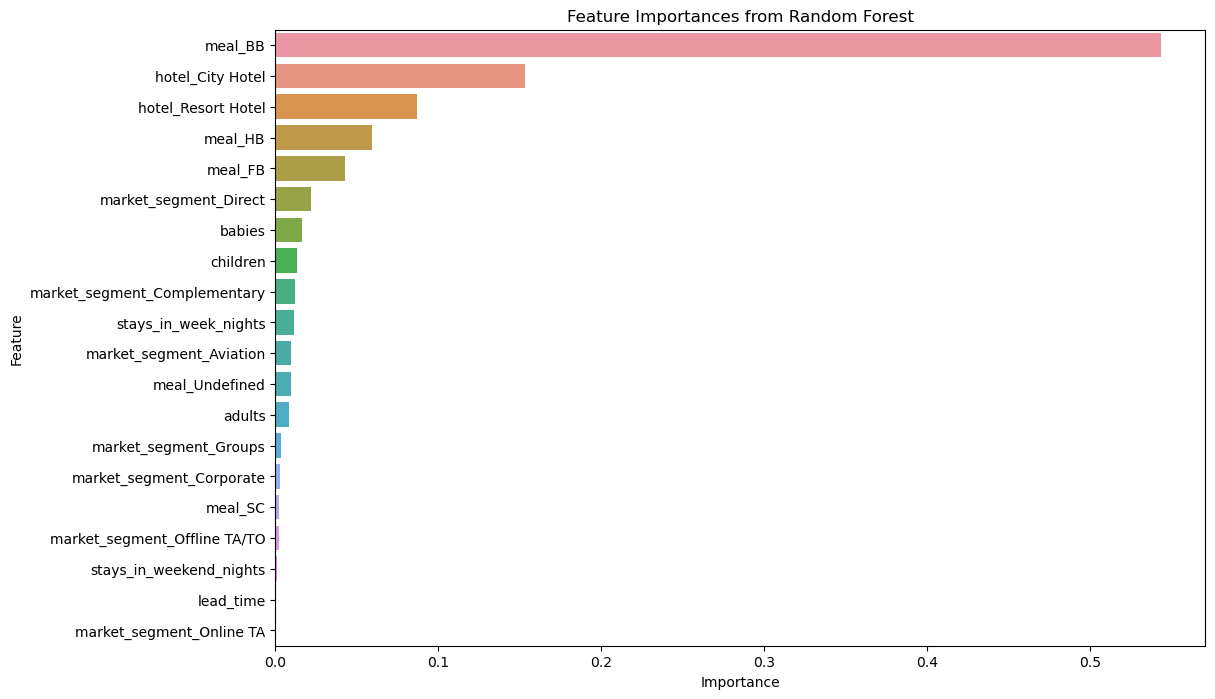

In [29]:
# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importances from Random Forest')
plt.savefig('Feature Importances from Random Forest.png')
plt.savefig('Feature Importances from Random Forest.pdf')
plt.show()

## Example of prediction

In [30]:
# Define the new data point
new_data = pd.DataFrame({
    'hotel': ['Resort Hotel'],
    'lead_time': [30],
    'stays_in_weekend_nights': [2],
    'stays_in_week_nights': [3],
    'adults': [2],
    'children': [0],
    'babies': [0],
    'meal': ['FB'],
    'market_segment': ['Direct']
})

In [31]:
# Use the trained Random Forest model to make a prediction
predicted_revenue = rf_model.predict(new_data)

print(f'Predicted Revenue: {round(predicted_revenue[0],2)}')

Predicted Revenue: 533.22


          hotel  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0  Resort Hotel         60                        2                     3   
1    City Hotel        120                        3                     4   
2  Resort Hotel         30                        1                     2   
3    City Hotel         45                        2                     5   

   adults  children  babies meal market_segment  predicted_revenue  
0       2         1       0   BB         Direct          848.53425  
1       2         0       0   HB      Corporate         1024.33925  
2       1         2       1   FB      Online TA          741.21160  
3       3         1       0   BB  Offline TA/TO         1089.66060  


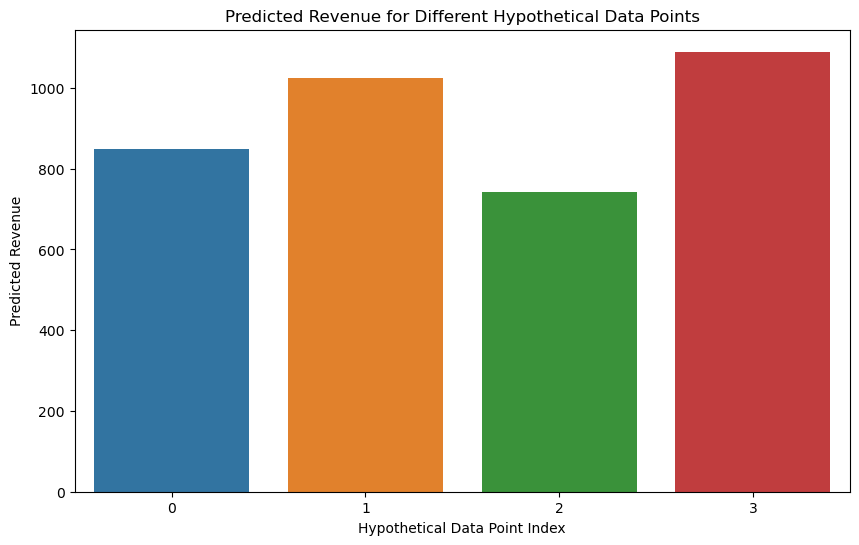

In [35]:
# Preprocess the data
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['adr'] = pd.to_numeric(data['adr'], errors='coerce')
data['revenue'] = data['adr'] * data['stay_duration']

# Select features and target
features = data[['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment']]
target = data['revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Preprocessing and model pipeline
numeric_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']
categorical_features = ['hotel', 'meal', 'market_segment']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

          hotel  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0  Resort Hotel         60                        2                     3   
1    City Hotel        120                        1                     4   
2  Resort Hotel         30                        1                     2   
3    City Hotel         45                        2                     5   

   adults  children  babies meal market_segment  predicted_revenue  
0       2         1       0   BB         Direct          848.53425  
1       2         0       0   HB      Corporate          675.29050  
2       1         2       1   FB      Online TA          741.21160  
3       3         1       0   BB  Offline TA/TO         1089.66060  


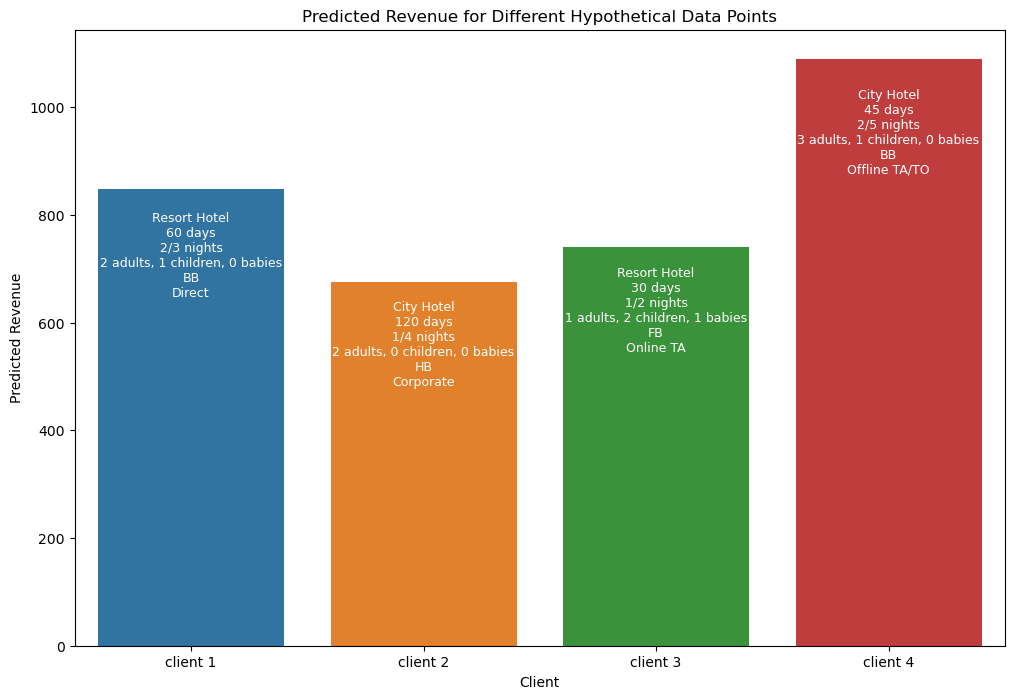

In [45]:
# Generate hypothetical data points
hypothetical_data = pd.DataFrame({
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel'],
    'lead_time': [60, 120, 30, 45],
    'stays_in_weekend_nights': [2, 1, 1, 2],
    'stays_in_week_nights': [3, 4, 2, 5],
    'adults': [2, 2, 1, 3],
    'children': [1, 0, 2, 1],
    'babies': [0, 0, 1, 0],
    'meal': ['BB', 'HB', 'FB', 'BB'],
    'market_segment': ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO']
})

# Use the trained Random Forest model to predict revenue for the hypothetical data points
predicted_revenues = rf_model.predict(hypothetical_data)

# Add predicted revenues to the hypothetical data DataFrame
hypothetical_data['predicted_revenue'] = predicted_revenues

# Display the DataFrame with predictions
print(hypothetical_data)

# Plot the predicted revenues for different hypothetical data points
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=hypothetical_data.index, y=hypothetical_data['predicted_revenue'])

# Set custom x-axis labels
ax.set_xticklabels(['client 1', 'client 2', 'client 3', 'client 4'])

# Annotate each bar with the specifics of each hypothesis
for index, row in hypothetical_data.iterrows():
    specifics = (
        f"{row['hotel']}\n"
        f"{row['lead_time']} days\n"
        f"{row['stays_in_weekend_nights']}/{row['stays_in_week_nights']} nights\n"
        f"{row['adults']} adults, {row['children']} children, {row['babies']} babies\n"
        f"{row['meal']}\n"
        f"{row['market_segment']}"
    )
    ax.text(index, row['predicted_revenue'] - (row['predicted_revenue'] * 0.05), specifics, color='white', ha="center", va="top", fontsize=9)

plt.xlabel('Client')
plt.ylabel('Predicted Revenue')
plt.title('Predicted Revenue for Different Hypothetical Data Points')
plt.savefig('Predicted Revenue for Different Hypothetical Data Points.png')
plt.savefig('Predicted Revenue for Different Hypothetical Data Points.pdf')
plt.show()